In [ ]:
student_name= 'aditya agarwal'
student_id= '46184821'

### Analysis of Epinions Data

We are provided with the Epinions data collected through a general consumer review web site Epinions.com. Each user on the site can rate and post a review for products (items) and other users would rate the review to show the helpfulness of the review.
In this data, for each user, we have user ID, gender, ratings (1-5) and reviews towards the products they bought. For each rating, we have the product name and its category, the rating score, the time point when the rating is created, and the helpfulness (1-5) of this rating.

Originally, there are several separate files to record the user-item rating info, user demographic info and item descriptive info, we have conducted preliminary processing to map and merge the data into one csv file named 'Epinions_test_data.csv'. The header of the csv file is shown below. 


| userId | gender | rating | review| item | category | helpfulness | timestamp |
    | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | 
    
#### Description of Fields

* __userId__ - the user's id
* __gender__ - the user's gender
* __item__ - the product's name
* __category__ - the category of the item
* __rating__ - the user's rating towards the item
* __review__ - the user's review towards the item
* __helpfulness__ - the helpfulness of this rating
* __timestamp__ - the timestamp when the rating is created

Note that, a same user (i.e., a same userId) corresponds to a same gender; a same item corresponds to a same category; a same user (i.e., a same userId) may rate multiple items; a same item may receive ratings and reviews from multiple users and each review is associted with a single helpfulness value calculated based on the feedbacks from other users.

There are four questions to explore with the data as shown below.

In [9]:
# variables used/declared 

# installing python image library
from PIL import Image
myImage = Image.open("variables_used.jpg")
myImage.show()

### Introduction & Testing the data

In [134]:
# importing all libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# reading the data [csv file]
test_data= 'Epinions_test_data.csv'
data_frame= pd.read_csv(test_data)

In [135]:
# display column name for the data
data_frame.columns

Index(['userId', 'gender', 'item', 'rating', 'review', 'helpfulness',
       'timestamp', 'category'],
      dtype='object')

In [136]:
# the data is stored in a variable defined as a dataframe by the name 'data_frame'
data_frame

,userId,gender,item,rating,review,helpfulness,timestamp,category
0,1324,F,NBC,5.0,They made it after all....,4.0,21400,Media
1,10222,M,NetFlix,2.0,Don't Bother Unless you live in a remote area,2.0,41604,Online Stores & Services
2,2777,M,Toy Story 2,4.0,Good for adults and children,4.0,10200,Movies
3,11763,M,Fight Club,5.0,I wish I wasn't hesitant about this movie,4.0,70100,Movies
4,6003,M,Quicken Loans,5.0,Used Quicken Loans to save time and money on r...,5.0,72103,Personal Finance
...,...,...,...,...,...,...,...,...
9995,5212,F,Perfect Storm,4.0,Fantastic Special Effects,3.0,81000,Movies
9996,5212,F,What Lies Beneath,2.0,Very Predictable,1.0,81000,Movies
9997,5319,M,Gladiator,5.0,The best ever movie made,4.0,122500,Movies
9998,5319,F,The Sims 2: Open for Business for Windows,5.0,Sims - build your dream city,6.0,122500,Games


In [137]:
# this function displays the head of the data, first five rows
data_frame.head()

,userId,gender,item,rating,review,helpfulness,timestamp,category
0,1324,F,NBC,5.0,They made it after all....,4.0,21400,Media
1,10222,M,NetFlix,2.0,Don't Bother Unless you live in a remote area,2.0,41604,Online Stores & Services
2,2777,M,Toy Story 2,4.0,Good for adults and children,4.0,10200,Movies
3,11763,M,Fight Club,5.0,I wish I wasn't hesitant about this movie,4.0,70100,Movies
4,6003,M,Quicken Loans,5.0,Used Quicken Loans to save time and money on r...,5.0,72103,Personal Finance


In [138]:
# counting the size of the data
data_frame.count()

userId         10000
gender          9973
item           10000
rating          9969
review         10000
helpfulness     9974
timestamp      10000
category       10000
dtype: int64

In [139]:
# counting the size of the data using len() function
rows = len(data_frame.axes[0])
cols = len(data_frame.axes[1])
print(rows)
print(cols)

10000
8


 #### Q1. Remove missing data
 
Please remove the following records in the csv file: 
 
 * gender/rating/helpfulness is missing
 * review is 'none'

__Display the DataFrame, counting number of Null values in each column, and print the length of the data__ before and after removing the missing data.  

### Solution for Question 1


In [140]:
# isnull().sum() function is used to display the sum of all null values in the data
data_frame.isnull().sum()

userId          0
gender         27
item            0
rating         31
review          0
helpfulness    26
timestamp       0
category        0
dtype: int64

In [141]:
# data cleaning step 1
# by using the drop.na() function, it will discard all null values in the selected columns
# temporary varibale "cleaning_df" to hold the value of the dataframe during the cleaning process
cleaning_df= data_frame.dropna(subset=['gender', 'rating', 'helpfulness'])
cleaning_df

,userId,gender,item,rating,review,helpfulness,timestamp,category
0,1324,F,NBC,5.0,They made it after all....,4.0,21400,Media
1,10222,M,NetFlix,2.0,Don't Bother Unless you live in a remote area,2.0,41604,Online Stores & Services
2,2777,M,Toy Story 2,4.0,Good for adults and children,4.0,10200,Movies
3,11763,M,Fight Club,5.0,I wish I wasn't hesitant about this movie,4.0,70100,Movies
4,6003,M,Quicken Loans,5.0,Used Quicken Loans to save time and money on r...,5.0,72103,Personal Finance
...,...,...,...,...,...,...,...,...
9995,5212,F,Perfect Storm,4.0,Fantastic Special Effects,3.0,81000,Movies
9996,5212,F,What Lies Beneath,2.0,Very Predictable,1.0,81000,Movies
9997,5319,M,Gladiator,5.0,The best ever movie made,4.0,122500,Movies
9998,5319,F,The Sims 2: Open for Business for Windows,5.0,Sims - build your dream city,6.0,122500,Games


In [142]:
# display the size of the data
cleaning_df.isnull().sum()

userId         0
gender         0
item           0
rating         0
review         0
helpfulness    0
timestamp      0
category       0
dtype: int64

In [143]:
# data cleaning step 2
# cleaned data frame
# varibale 'clean_df' for the final step of cleaning data here
clean_df= cleaning_df[cleaning_df['review'].str.contains('none')==False]
clean_df

,userId,gender,item,rating,review,helpfulness,timestamp,category
0,1324,F,NBC,5.0,They made it after all....,4.0,21400,Media
1,10222,M,NetFlix,2.0,Don't Bother Unless you live in a remote area,2.0,41604,Online Stores & Services
2,2777,M,Toy Story 2,4.0,Good for adults and children,4.0,10200,Movies
3,11763,M,Fight Club,5.0,I wish I wasn't hesitant about this movie,4.0,70100,Movies
4,6003,M,Quicken Loans,5.0,Used Quicken Loans to save time and money on r...,5.0,72103,Personal Finance
...,...,...,...,...,...,...,...,...
9995,5212,F,Perfect Storm,4.0,Fantastic Special Effects,3.0,81000,Movies
9996,5212,F,What Lies Beneath,2.0,Very Predictable,1.0,81000,Movies
9997,5319,M,Gladiator,5.0,The best ever movie made,4.0,122500,Movies
9998,5319,F,The Sims 2: Open for Business for Windows,5.0,Sims - build your dream city,6.0,122500,Games


In [144]:
#display all null values in the clean data set
clean_df.isnull().sum()


userId         0
gender         0
item           0
rating         0
review         0
helpfulness    0
timestamp      0
category       0
dtype: int64

#### Q2. Descriptive statistics

With the cleaned data in Q1, please provide the data summarization as below:

* Q2.1 total number of unique users, unique reviews, unique items, and unique categories
* Q2.2 descriptive statistics, e.g., the total number, mean, std, min and max regarding all rating records
* Q2.3 descriptive statistics, e.g., mean, std, max, and min of the number of items rated by different genders 
* Q2.4 descriptive statistics, e.g., mean, std, max, min of the number of ratings that received by each items 


### Solutions for Question 2

In [145]:
# Question 2 Part 1
# display and count all unique values in the column 'userId'
# len() function used to display the length of the unique values in 'userId'
clean_df.userId.unique()
count_users= len(clean_df.userId.unique())
print(clean_df.userId.unique())
# added space for better readability and visibility of code
print('')
print('The number of unique users are->', count_users)

print('')
print('')
print('')

# display and count all unique values in the column 'review'
# len() function used to display the length of the unique values in 'review'
clean_df.review.unique()
count_review= len(clean_df.review.unique())
print(clean_df.review.unique())
# added space for better readability and visibility of code
print('')
print('The number of unique reviews are->', count_review)

print('')
print('')
print('')


# display and count all unique values in the column 'item'
# len() function used to display the length of the unique values in 'item'
clean_df.item.unique()
count_item= len(clean_df.item.unique())
print(clean_df.item.unique())
#added space for better readability and visibility of code
print('')
print('The number of unique items are->', count_item)

print('')
print('')
print('')

# display and count all unique values in the column 'category'
# len() function used to display the length of the unique values in 'category'
clean_df.category.unique()
count_category= len(clean_df.category.unique())
print(clean_df.category.unique())
# added space for better readability and visibility of code
print('')
print('The number of unique categories are->', count_category)









[ 1324 10222  2777 ...  5212  5319  7606]

The number of unique users are-> 4325



['They made it after all....'
 "Don't Bother Unless you live in a remote area"
 'Good for adults and children' ... 'The best ever movie made'
 'Sims - build your dream city'
 "Why not to use Altavista &amp; other free isp's"]

The number of unique reviews are-> 9725



['NBC' 'NetFlix' 'Toy Story 2' 'Fight Club' 'Quicken Loans'
 'Outback Steakhouse' "Applebee's" 'Mission: Impossible II' 'Scary Movie'
 'New York City' 'eBay'
 'The Legend Of Zelda Ocarina Of Time for Nintendo 64' 'Sixth Sense' 'FOX'
 'Huggies Ultra Trim Diapers' 'South Park: Bigger, Longer & Uncut'
 'All Advantage' 'NetZero' 'Sega Dreamcast Grey Console'
 'AOL (America Online)' 'Southwest Airlines'
 'Sony PlayStation 2 Slimline Console' 'Blair Witch Project'
 "J. K. Rowling - Harry Potter and the Sorcerer's Stone" 'PayPal'
 'BlueLight.com' 'Green Mile' 'Road Runner (includes MediaOne)'
 'American Airlines' 'Austin Powers: The Spy Who Shag

In [146]:
#Question 2 Part 2
#summary statistics of 'rating' in the data frame using .describe() function

clean_df['rating'].describe()

count    9888.000000
mean        3.701557
std         1.387146
min         1.000000
25%         3.000000
50%         4.000000
75%         5.000000
max         5.000000
Name: rating, dtype: float64

In [147]:
# Question 2 Part 3
# display the count and summary statistics of all the ratings by specific genders 
print(clean_df.groupby(['gender'])['rating'].describe())

# display the count and summary statistics of the number of items rated by different genders 
clean_df.groupby(['gender', 'item'])['rating'].describe()

         count      mean       std  min  25%  50%  75%  max
gender                                                     
F       5024.0  3.712182  1.388056  1.0  3.0  4.0  5.0  5.0
M       4864.0  3.690584  1.386261  1.0  3.0  4.0  5.0  5.0


count      mean       std  min   25%  50%  75%  \
gender item                                                                    
F      AOL (America Online)   212.0  2.504717  1.354290  1.0  1.00  2.0  4.0   
       All Advantage          134.0  3.604478  1.511951  1.0  2.00  4.0  5.0   
       Alta Vista (by 1stUp)   45.0  3.444444  1.253279  1.0  3.00  4.0  4.0   
       Amazon.com              61.0  3.934426  1.412667  1.0  3.00  5.0  5.0   
       American Airlines       43.0  3.186047  1.500092  1.0  2.00  4.0  4.5   
...                             ...       ...       ...  ...   ...  ...  ...   
M      Wendy's                 40.0  3.950000  1.259833  1.0  3.00  4.0  5.0   
       What Lies Beneath       45.0  3.644444  1.264112  1.0  3.00  4.0  5.0   
       X-Men                   57.0  3.894737  0.976221  1.0  3.00  4.0  5.0   
       X.com                   50.0  3.660000  1.598596  1.0  2.25  4.0  5.0   
       eBay                   145.0  4.344828  0.967380  1.0  4.00  5.0  5.0   

                              max  
gender item                        
F      AOL (America Online)   5.0  
       All Advantage          5.0  
       Alta Vista (by 1stUp)  5.0  
       Amazon.com             5.0  
       American Airlines      5.0  
...                           ...  
M      Wendy's                5.0  
       What Lies Beneath      5.0  
       X-Men                  5.0  
       X.com                  5.0  
       eBay                   5.0  

[178 rows x 8 columns]

In [148]:
# Question 2 part 4
# display the count and summary statistics of the number of ratings that is received by each items 
clean_df.groupby(['item'])['rating'].describe()

,count,mean,std,min,25%,50%,75%,max
item,,,,,,,,
AOL (America Online),446.0,2.538117,1.339841,1.0,1.0,2.0,4.00,5.0
All Advantage,306.0,3.539216,1.466600,1.0,2.0,4.0,5.00,5.0
Alta Vista (by 1stUp),84.0,3.369048,1.369018,1.0,2.0,4.0,4.00,5.0
Amazon.com,110.0,3.836364,1.455942,1.0,3.0,4.0,5.00,5.0
American Airlines,92.0,3.163043,1.477131,1.0,2.0,3.0,4.25,5.0
...,...,...,...,...,...,...,...,...
Wendy's,88.0,4.102273,1.155096,1.0,4.0,4.0,5.00,5.0
What Lies Beneath,85.0,3.576471,1.189002,1.0,3.0,4.0,4.00,5.0
X-Men,121.0,4.033058,0.893811,1.0,4.0,4.0,5.00,5.0


#### Q3. Plotting and Analysis

Please try to explore the correlation between gender/helpfulness/category and ratings; for instance, do female/male users tend to provide higher ratings than male/female users? Hint: you may use the boxplot function to plot figures for comparison (___Challenge___)
    
You may need to select the most suitable graphic forms for ease of presentation. Most importantly, for each figure or subfigure, please summarise ___what each plot shows___ (i.e. observations and explanations). Finally, you may need to provide an overall summary of the data.

### Solution for Question 3

<Figure size 1152x432 with 0 Axes>

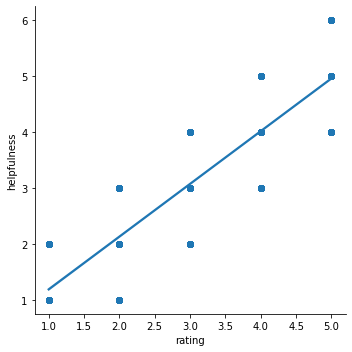

In [149]:
# using the seaborn library for plotting graphs with better visualisation
# variable 'visual_data' for displaying graphs
# cleaning the data again by removing the column 'timestamp'
visual_data= clean_df.drop(['timestamp'], axis=1)
visual_data

#plotting 'rating' and 'helpfulness' to understand how user ratings were helpful to the general public 
plt.figure(figsize=(16,6))
sns.lmplot(x='rating', y='helpfulness', data=visual_data)


### A linear model plot to show how user ratings affected the helpfulness
- On the x-axis there are user rating
- On the y-axix there is helpfulness

<AxesSubplot:xlabel='category', ylabel='rating'>

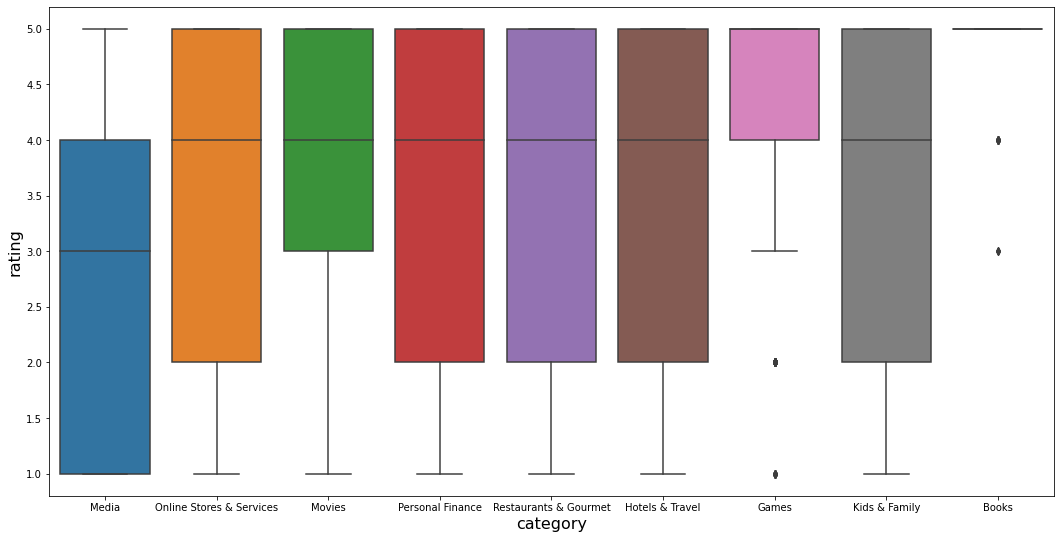

In [150]:
# plotting 'category' and 'ratings' to compare how ratings are spread across categories
plt.figure(figsize=(18,9))
plt.xlabel('CATEGORY', size=16)
plt.ylabel('RATING', size=16)
sns.boxplot(x='category', y='rating', data=visual_data)

### This boxplot depicts how all users ratings in different categories

- We can observe outliers in the 'Games' & 'Books' category.
- The range of the data variates the most in the category 'Books'
- The ratings of all categories touch 5.0 except for 'Media'

<AxesSubplot:xlabel='category', ylabel='rating'>

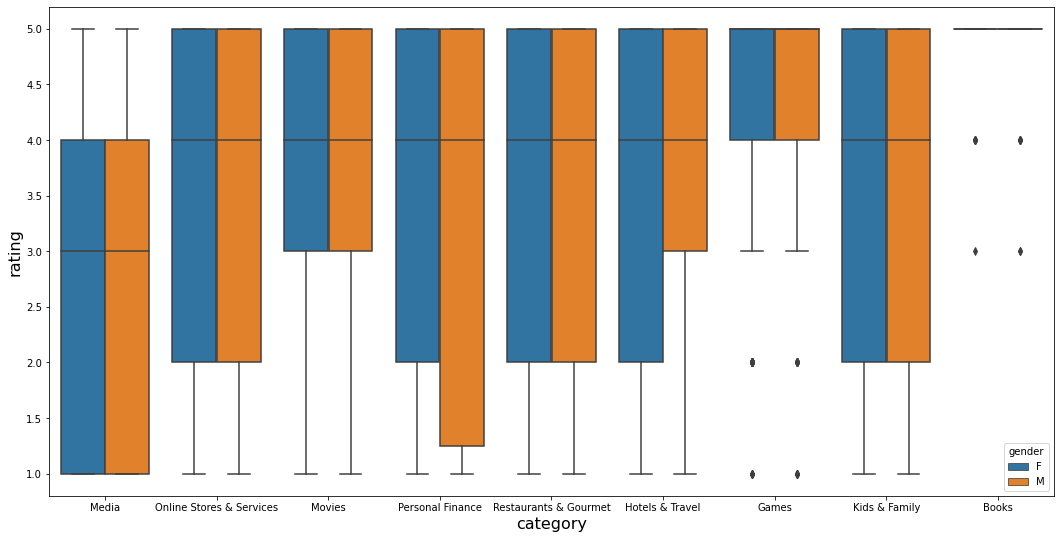

In [151]:
# plotting 'category' and 'rating' in accordance with 'gender' to analyse which category received ratings from which gender
plt.figure(figsize=(18,9))
plt.xlabel('CATEGORY', size=16)
plt.ylabel('RATING', size=16)
sns.boxplot(x='category', y='rating',hue='gender', data=visual_data)

### The boxplot depicts the how male and female users rated specific categories

- We can observe outliers in the 'Games' & 'Books' category. However in respect to male & female users the outliers have changed their position in reference to the previous boxplot.
- The ratings of male & female users were same across all categories except 'Personal Finance' & 'Hotels & Travel'.

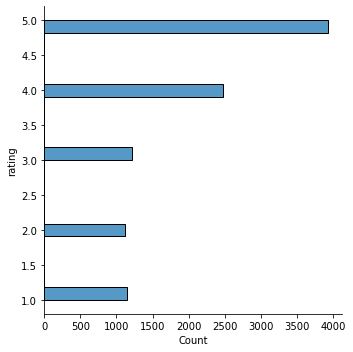

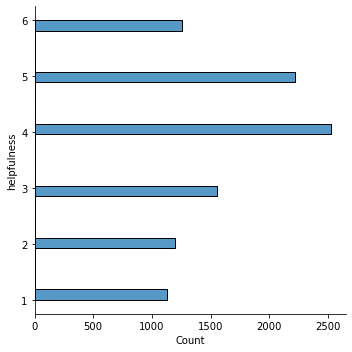

In [152]:
# comparision between 'rating' and 'helpfulness' with respect to the user count

sns.displot( y=visual_data.rating)
sns.displot( y=visual_data.helpfulness)

### This is a comparision between rating and helpfulness. 

#### Graph 1 ->
- On the x-axis there are number of users and on y-axis there are ratings
- The graph depicts ratings given by different users 


#### Graph 2 ->
- On the x-axis there are number of users and on y-axis there is helpfulness
- The graph depicts the helpfulness(numerised)

#### Q4. Detect and remove outliers

We may define outlier users and items with three rules:

* users whose helpfulness is no more than 2
* users who rate less than 7 items
* items that receives less than 11 ratings 
 
Please remove the corresponding records in the csv file that involves outlier users and items. After that, __print the length of the data__.

### Solution for Question 4

In [153]:
# variable 'outliers_data' to clean the data further by removing users whose helpfulnes<=2.0
outliers_data= visual_data.drop(visual_data.index[(visual_data.helpfulness<=2.0)])
outliers_data
                        

,userId,gender,item,rating,review,helpfulness,category
0,1324,F,NBC,5.0,They made it after all....,4.0,Media
2,2777,M,Toy Story 2,4.0,Good for adults and children,4.0,Movies
3,11763,M,Fight Club,5.0,I wish I wasn't hesitant about this movie,4.0,Movies
4,6003,M,Quicken Loans,5.0,Used Quicken Loans to save time and money on r...,5.0,Personal Finance
5,9525,M,Outback Steakhouse,4.0,"Good choice for a reasonably priced, quality s...",3.0,Restaurants & Gourmet
...,...,...,...,...,...,...,...
9993,1599,M,All Advantage,2.0,Money For &quot;Nothing&quot;,3.0,Online Stores & Services
9994,1599,M,Google,5.0,Google: Simplicity is Golden,4.0,Online Stores & Services
9995,5212,F,Perfect Storm,4.0,Fantastic Special Effects,3.0,Movies
9997,5319,M,Gladiator,5.0,The best ever movie made,4.0,Movies


In [154]:
# variable 'cleaning_outliers_data' to remove users who rate less than 7 items
cleaning_outliers_data= outliers_data[outliers_data['userId'].isin(outliers_data['userId'].value_counts()[outliers_data['userId'].value_counts() > 7].index)]
cleaning_outliers_data

,userId,gender,item,rating,review,helpfulness,category
298,667,M,Earthlink,2.0,Earthlink: Run! Run Away! FAR Away!,3.0,Online Stores & Services
299,667,F,Delta Air Lines,2.0,Delta - Mediocre Airline,3.0,Hotels & Travel
300,667,M,Erin Brockovich,5.0,Roberts ROCKS!,5.0,Movies
301,667,F,All Advantage,3.0,It's okay,3.0,Online Stores & Services
304,667,F,MyPoints.com,4.0,Woo Hoo! Free Stuff!,5.0,Online Stores & Services
...,...,...,...,...,...,...,...
9813,12167,M,Sony PlayStation 2 Slimline Console,4.0,"A new look, can it deliver",5.0,Games
9814,12167,M,Gladiator,4.0,If you love drama,5.0,Movies
9815,12167,M,NetZero,5.0,A fair price,5.0,Online Stores & Services
9816,12167,M,Diablo 2 - Bestseller Series for Windows,5.0,Nice..,6.0,Games


In [155]:
# variable 'final_data' to remove items that receives less than 11 ratings
final_data= cleaning_outliers_data[cleaning_outliers_data['item'].isin(cleaning_outliers_data['item'].value_counts()[cleaning_outliers_data['item'].value_counts() > 11].index)]
final_data

,userId,gender,item,rating,review,helpfulness,category
300,667,M,Erin Brockovich,5.0,Roberts ROCKS!,5.0,Movies
301,667,F,All Advantage,3.0,It's okay,3.0,Online Stores & Services
304,667,F,MyPoints.com,4.0,Woo Hoo! Free Stuff!,5.0,Online Stores & Services
305,667,F,Blue Mountain Arts eCards,5.0,Delivering Smiles 24-7,6.0,Online Stores & Services
306,667,M,Taco Bell,3.0,Not Bad Once In A While,3.0,Restaurants & Gourmet
...,...,...,...,...,...,...,...
9811,12167,M,Star Wars Episode I: The Phantom Menace,4.0,The long wait,5.0,Movies
9812,12167,M,Sixth Sense,4.0,Makes you think..,4.0,Movies
9814,12167,M,Gladiator,4.0,If you love drama,5.0,Movies
9815,12167,M,NetZero,5.0,A fair price,5.0,Online Stores & Services


In [132]:
# print the length of the data (final_data)
print(len(final_data))

700


In [133]:
# count the final_data
final_data.count()

userId         700
gender         700
item           700
rating         700
review         700
helpfulness    700
category       700
dtype: int64